<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.146933,30.464262,63.358737,-38.869452,117.100479,156.551555,-39.451076
1,0.0,1.0,32.732393,48.490808,47.569674,63.678009,202.470884,134.336289,68.134595
2,0.0,2.0,67.308768,22.835690,55.093950,-3.386993,151.851415,155.304030,-3.452615
3,0.0,3.0,99.962705,21.924794,85.155544,-26.439265,190.603778,222.123305,-31.519527
4,0.0,4.0,81.438505,95.923656,87.908663,-2.539205,272.731620,270.771925,1.959695
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,63.299617,45.450837,24.195267,-29.864806,113.080916,141.799907,-28.718991
249996,999.0,246.0,32.180932,86.941312,23.847829,32.066916,185.036989,166.494222,18.542766
249997,999.0,247.0,88.863345,47.487124,83.999605,-28.424062,201.926012,233.850247,-31.924234
249998,999.0,248.0,49.438863,86.593616,29.058070,-56.531577,118.558971,187.618240,-69.059269


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.146933,30.464262,63.358737,-38.869452,117.100479,156.551555,-39.451076
1,0.0,1.0,32.732393,48.490808,47.569674,63.678009,202.470884,134.336289,68.134595
2,0.0,2.0,67.308768,22.835690,55.093950,-3.386993,151.851415,155.304030,-3.452615
3,0.0,3.0,99.962705,21.924794,85.155544,-26.439265,190.603778,222.123305,-31.519527
4,0.0,4.0,81.438505,95.923656,87.908663,-2.539205,272.731620,270.771925,1.959695
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,63.299617,45.450837,24.195267,-29.864806,113.080916,141.799907,-28.718991
249996,999.0,246.0,32.180932,86.941312,23.847829,32.066916,185.036989,166.494222,18.542766
249997,999.0,247.0,88.863345,47.487124,83.999605,-28.424062,201.926012,233.850247,-31.924234
249998,999.0,248.0,49.438863,86.593616,29.058070,-56.531577,118.558971,187.618240,-69.059269


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    52.146933  30.464262  ...  156.551555  -39.451076
      1.0    32.732393  48.490808  ...  134.336289   68.134595
      2.0    67.308768  22.835690  ...  155.304030   -3.452615
      3.0    99.962705  21.924794  ...  222.123305  -31.519527
      4.0    81.438505  95.923656  ...  270.771925    1.959695
...                ...        ...  ...         ...         ...
999.0 245.0  63.299617  45.450837  ...  141.799907  -28.718991
      246.0  32.180932  86.941312  ...  166.494222   18.542766
      247.0  88.863345  47.487124  ...  233.850247  -31.924234
      248.0  49.438863  86.593616  ...  187.618240  -69.059269
      249.0  32.496284  80.766930  ...  170.765212  223.661585

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    52.146933  30.464262  ...  156.551555  -39.451076
      1.0    32.732393  48.490808  ...  134.336289   68.134595
      2.0    67.308768  22.835690  ...  155.304030   -3.452615
      3.0    99.962705  21.924794  ...  222.123305  -31.519527
      4.0    81.438505  95.923656  ...  270.771925    1.959695
...                ...        ...  ...         ...         ...
999.0 245.0  63.299617  45.450837  ...  141.799907  -28.718991
      246.0  32.180932  86.941312  ...  166.494222   18.542766
      247.0  88.863345  47.487124  ...  233.850247  -31.924234
      248.0  49.438863  86.593616  ...  187.618240  -69.059269
      249.0  32.496284  80.766930  ...  170.765212  223.661585

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.146933,30.464262,63.358737,-38.869452,117.100479,156.551555,-39.451076
1,0.0,1.0,32.732393,48.490808,47.569674,63.678009,202.470884,134.336289,68.134595
2,0.0,2.0,67.308768,22.835690,55.093950,-3.386993,151.851415,155.304030,-3.452615
3,0.0,3.0,99.962705,21.924794,85.155544,-26.439265,190.603778,222.123305,-31.519527
4,0.0,4.0,81.438505,95.923656,87.908663,-2.539205,272.731620,270.771925,1.959695
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,63.299617,45.450837,24.195267,-29.864806,113.080916,141.799907,-28.718991
249996,999.0,246.0,32.180932,86.941312,23.847829,32.066916,185.036989,166.494222,18.542766
249997,999.0,247.0,88.863345,47.487124,83.999605,-28.424062,201.926012,233.850247,-31.924234
249998,999.0,248.0,49.438863,86.593616,29.058070,-56.531577,118.558971,187.618240,-69.059269


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    52.146933  30.464262  ...  156.551555  -39.451076
      1.0    32.732393  48.490808  ...  134.336289   68.134595
      2.0    67.308768  22.835690  ...  155.304030   -3.452615
      3.0    99.962705  21.924794  ...  222.123305  -31.519527
      4.0    81.438505  95.923656  ...  270.771925    1.959695
...                ...        ...  ...         ...         ...
999.0 245.0  63.299617  45.450837  ...  141.799907  -28.718991
      246.0  32.180932  86.941312  ...  166.494222   18.542766
      247.0  88.863345  47.487124  ...  233.850247  -31.924234
      248.0  49.438863  86.593616  ...  187.618240  -69.059269
      249.0  32.496284  80.766930  ...  170.765212  223.661585

[250000 rows x 7 columns]

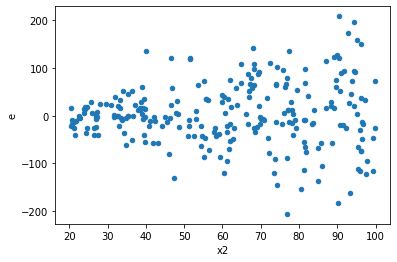

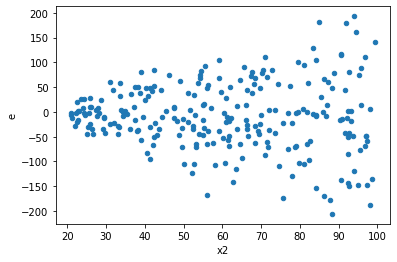

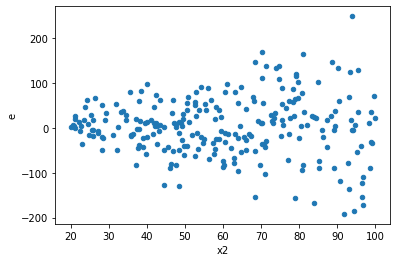

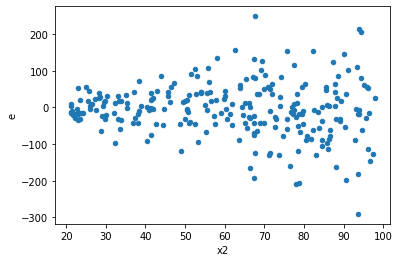

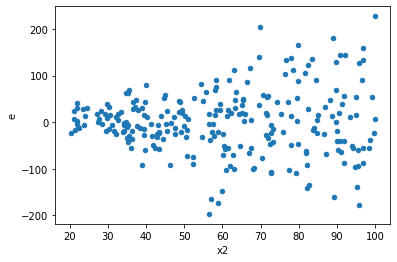

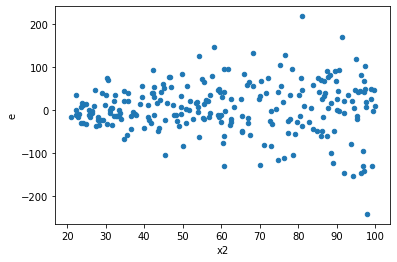

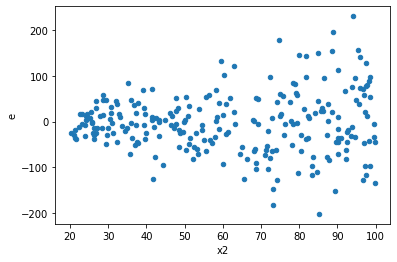

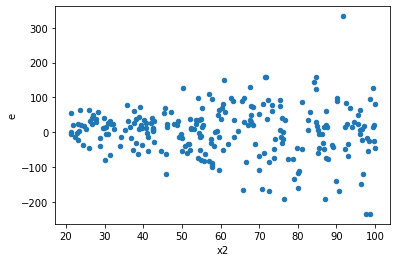

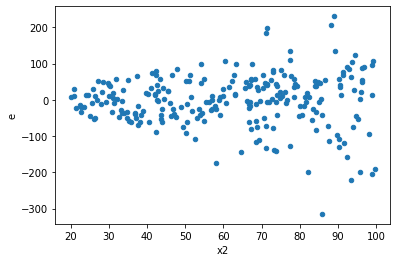

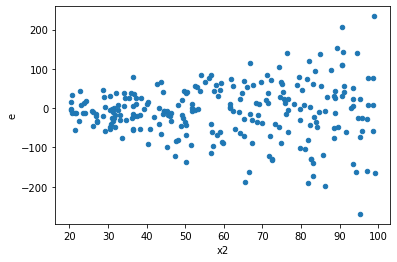

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,166154.98002597902,663717.0960519243,1712.9379384121548,6842.444289195096,3.9945663738044406,5.4827919981903506e-11,0.999999999972586,2.7413959990951753e-11,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,108099.48562883031,651439.8372748282,1114.4276868951579,6715.874611080703,6.026299139957129,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,223972.06407014205,722077.9620925721,2308.9903512385777,7444.10270198528,3.2239644041787137,2.173794344528801e-08,0.9999999891310283,1.0868971722644005e-08,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,152691.341975107,498167.7725203334,1574.1375461351238,5135.750232168386,3.2625803537803004,1.5897848371082546e-08,0.9999999920510758,7.948924185541273e-09,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,137349.32648907846,924937.0088176045,1415.9724380317368,9535.43308059386,6.734193988866426,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,112318.62668685343,672543.5520052687,1157.9239864624064,6933.438680466688,5.987818510996699,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,149220.38724614578,676895.8375966921,1538.3545076922246,6978.307604089609,4.5362155271727165,1.1319833959078096e-12,0.999999999999434,5.659916979539048e-13,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,104126.29900285049,673387.8724838959,1073.4670000293866,6942.1430152978955,6.467029741117195,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,133432.0859195927,848604.3171131214,1375.5885146349763,8748.498114568261,6.359822011809794,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,166154.98002597902,663717.0960519243,1712.9379384121548,6842.444289195096,3.9945663738044406,5.4827919981903506e-11,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,108099.48562883031,651439.8372748282,1114.4276868951579,6715.874611080703,6.026299139957129,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,223972.06407014205,722077.9620925721,2308.9903512385777,7444.10270198528,3.2239644041787137,2.173794344528801e-08,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,152691.341975107,498167.7725203334,1574.1375461351238,5135.750232168386,3.2625803537803004,1.5897848371082546e-08,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,137349.32648907846,924937.0088176045,1415.9724380317368,9535.43308059386,6.734193988866426,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,112318.62668685343,672543.5520052687,1157.9239864624064,6933.438680466688,5.987818510996699,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,149220.38724614578,676895.8375966921,1538.3545076922246,6978.307604089609,4.5362155271727165,1.1319833959078096e-12,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,104126.29900285049,673387.8724838959,1073.4670000293866,6942.1430152978955,6.467029741117195,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,133432.0859195927,848604.3171131214,1375.5885146349763,8748.498114568261,6.359822011809794,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64